In [1]:
%pip install scikit-learn
%pip install matplotlib
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv("./dataset/merged_csv/cleaned_merged_heart_dataset.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1


In [4]:
X = dataset.drop('target', axis=1)
y = dataset['target']

In [5]:
# Install necessary libraries
%pip install numpy pandas scikit-learn matplotlib seaborn tqdm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [6]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming X and y are already defined and preprocessed

# Step 1: Impute missing values in features using the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 2: Set the random_state to 30001
random_state_value = 36994

# Step 3: Split the data into training and testing sets using the specified random_state
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=random_state_value)

# Step 4: Initialize the Decision Tree classifier with the chosen random_state
model = DecisionTreeClassifier(random_state=random_state_value)

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Make predictions with the model
y_pred = model.predict(X_test)


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calculate error rate
error_rate = 1 - accuracy

# Extract True Negatives (TN), False Positives (FP), False Negatives (FN), and True Positives (TP) from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Output the final metrics
print(f"\nModel Accuracy with random_state={random_state_value}: {accuracy * 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Model Accuracy with random_state=36994: 97.25%
Error Rate: 2.75%
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
Specificity: 0.97

Confusion Matrix:
[[206   7]
 [  5 219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       213
           1       0.97      0.98      0.97       224

    accuracy                           0.97       437
   macro avg       0.97      0.97      0.97       437
weighted avg       0.97      0.97      0.97       437



C:\Users\farha\AppData\Local\Temp\ipykernel_25268\3896776219.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, ax=axs[1], palette=colors)


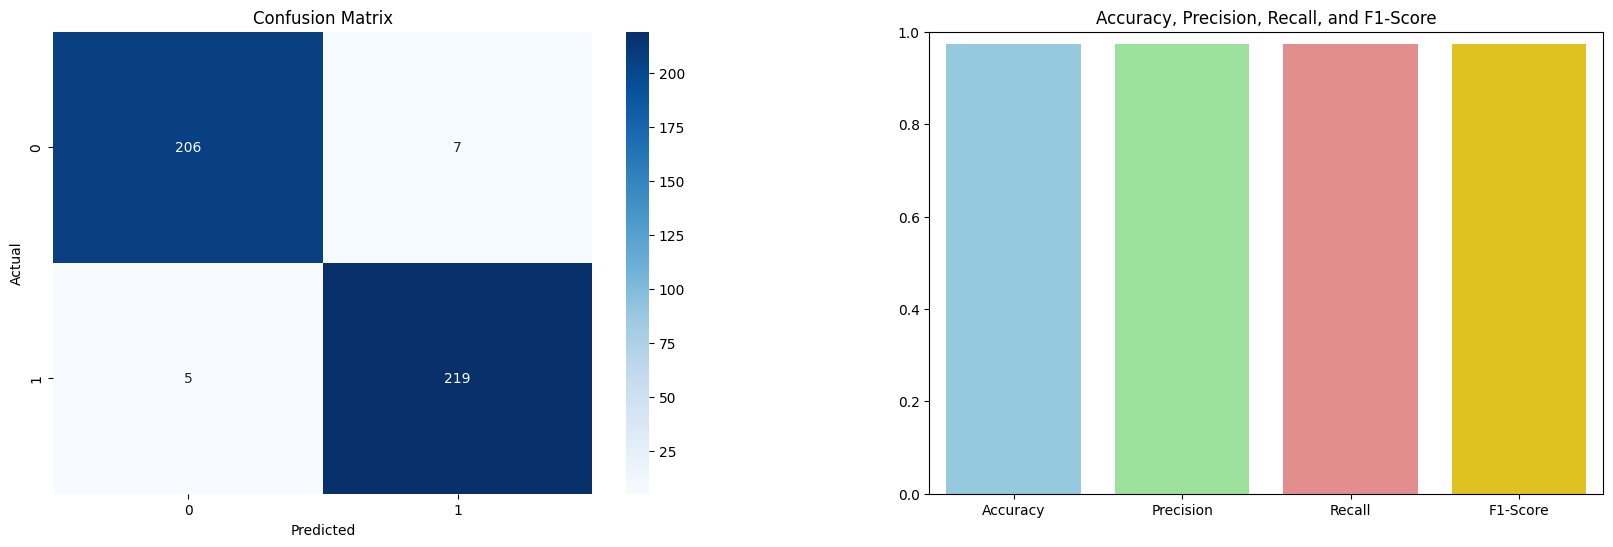

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 8: Visualization with subplots

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # Two subplots: confusion matrix and precision/recall/F1-score

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
axs[0].set_title('Confusion Matrix')

# Plot Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']  # Different colors for each bar

sns.barplot(x=metrics, y=values, ax=axs[1], palette=colors)
axs[1].set_ylim(0, 1)
axs[1].set_title('Accuracy, Precision, Recall, and F1-Score')

# Adjust the space between the subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()


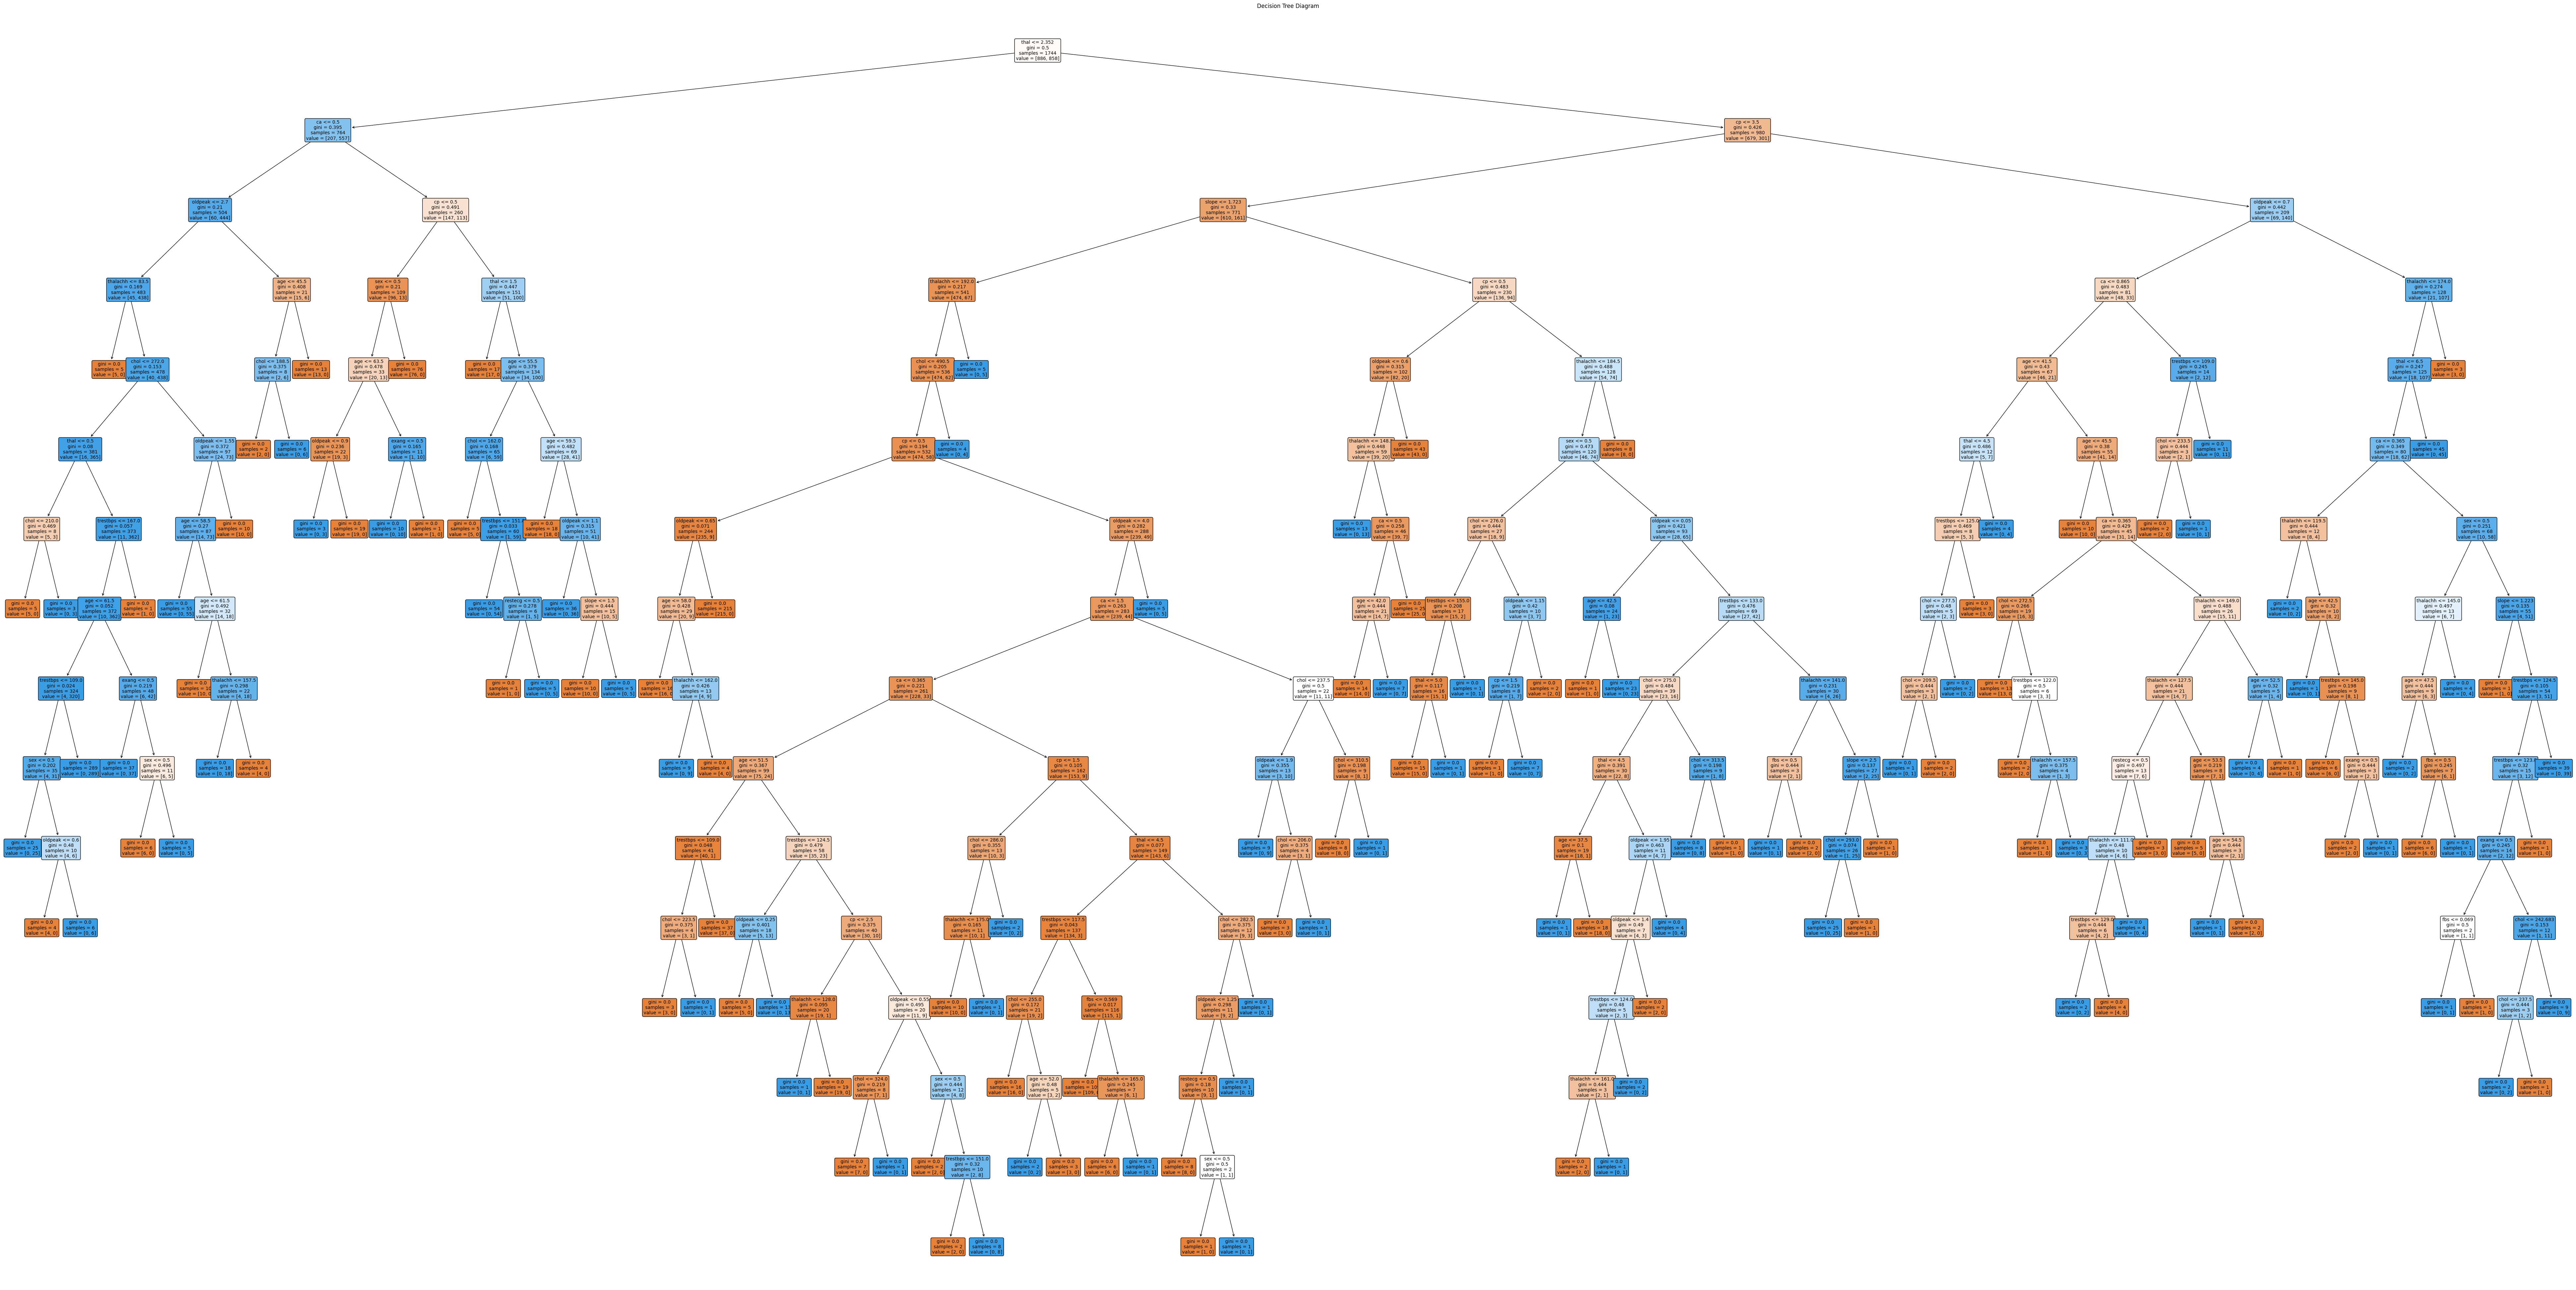

In [9]:
import os
from sklearn import tree
import matplotlib.pyplot as plt

# Ensure the PATH is set correctly for Graphviz if using it for export
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# Set figure size (width, height) in inches
plt.figure(figsize=(100, 50))

# Plot the tree with color, fontsize, and feature names
tree.plot_tree(
    model, 
    fontsize=10, 
    feature_names=X.columns, 
    filled=True,    # Color the nodes based on the predicted class
    rounded=True    # Rounded nodes for a cleaner look
)

# Display the plot
plt.title('Decision Tree Diagram')
plt.show()


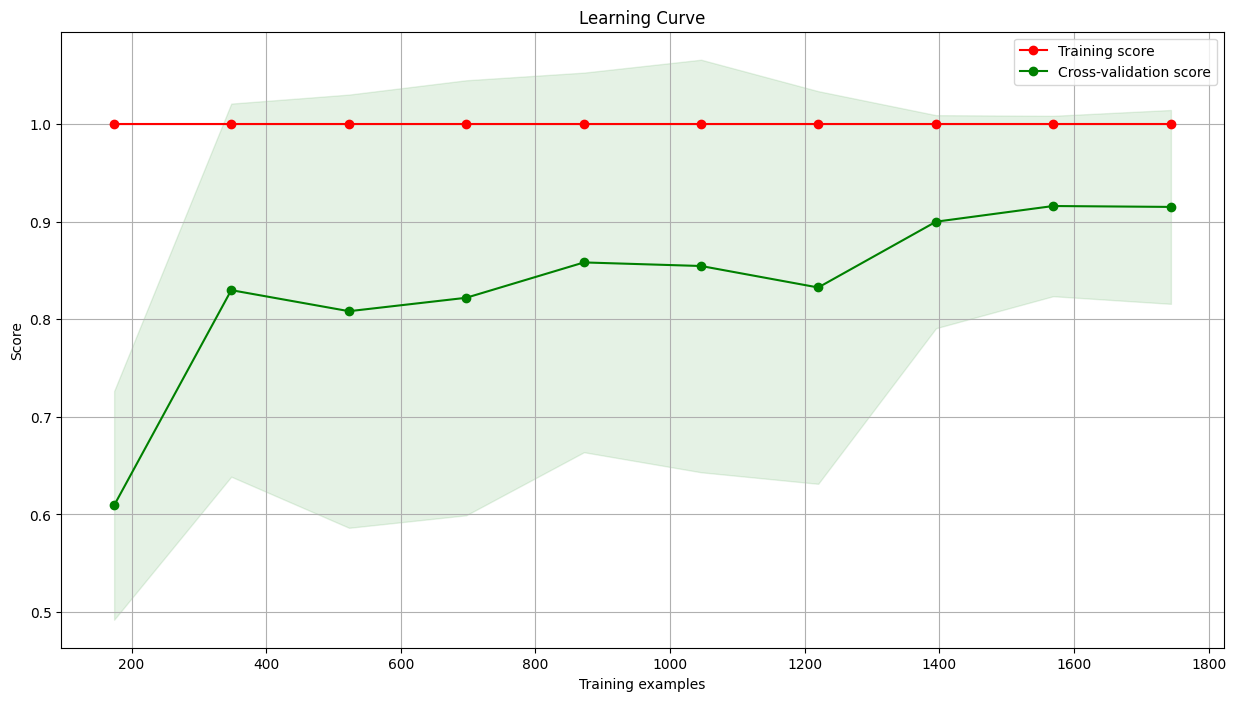

In [10]:
from sklearn.model_selection import learning_curve

# Step 9: Plotting the Learning Curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_imputed, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=random_state_value)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(15, 8))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


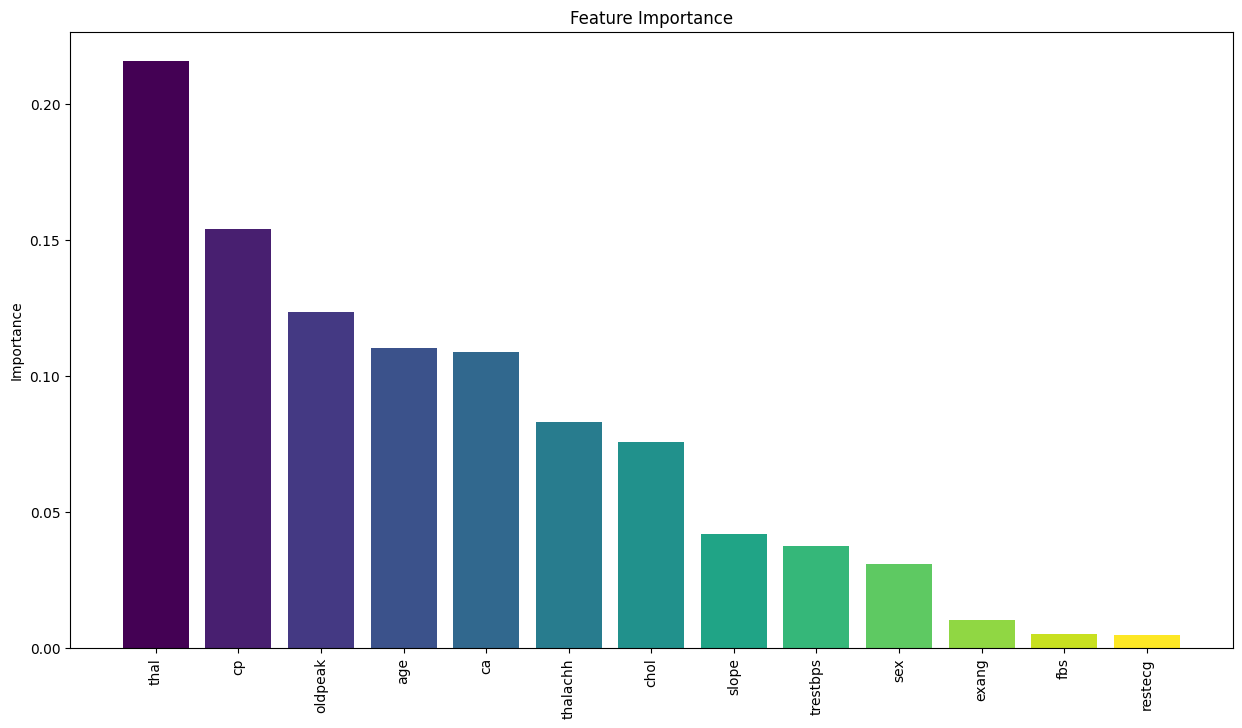

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate feature importances and sort them
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, X_train.shape[1]))

# Plot the feature importances with different colors for each bar
plt.figure(figsize=(15, 8))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], color=colors, align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.ylabel('Importance')
plt.show()
